# When Would Virat Ovetake Sachin in ODI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
import requests  # Import the requests library


### My Requirement

when would virat reach the top scores ODI cricet?

In [3]:
# Define the URL of the website you want to fetch data from
url = "http://www.cricmetric.com/playerstats.py?player=SR+Tendulkar&role=all&format=all&groupby=year"

# Fetch the data from the website
response = requests.get(url)

In [4]:
sachin_years = []
year_list = range(1990,2013)
for i in year_list:
    sachin_years.append(i)
    
sachin_years

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012]

In [5]:
sachin_years = np.array(sachin_years)

In [6]:
sachin_years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

In [7]:
sachin_runs = np.array([239,417,704,319,1089,444,1611,1011,1894,843,1328,904,741,1141,812,412,628,1425,460,972,204,513,315])


In [8]:
sachin_runs.size

23

In [9]:

 
def show_plot(years, runs, title):
    plt.rcParams["figure.figsize"] = (25, 6)
    plt.plot(years, runs)
    plt.grid(True)
    plt.xticks(years)
    plt.title(title)
    plt.show()



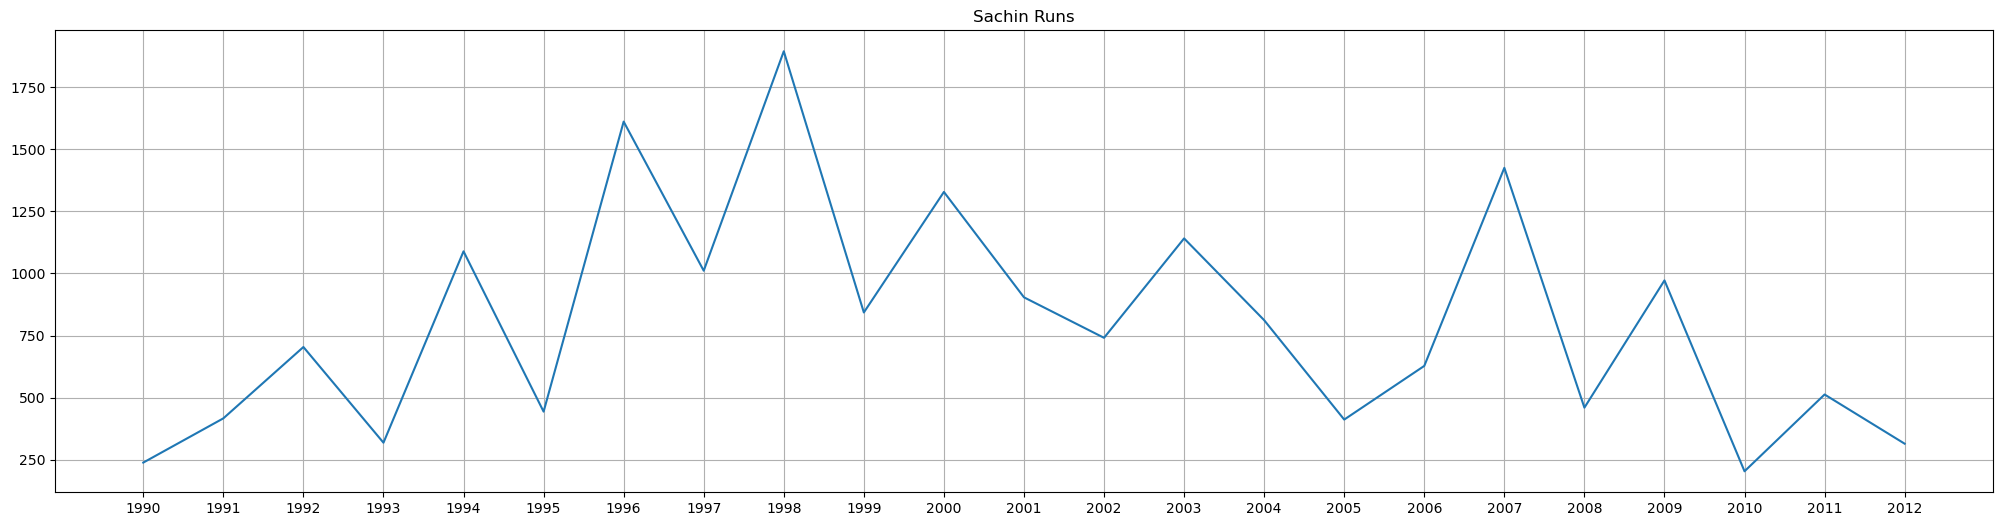

In [10]:
show_plot(sachin_years,sachin_runs,'Sachin Runs')

In [11]:
np.amax(sachin_runs)

1894

In [12]:
def show_plot(years, runs, title):
    plt.rcParams["figure.figsize"] = (25, 6)
    plt.plot(years, runs)
    plt.grid(True)
    plt.xticks(years)
    plt.title(title)
    plt.show()



In [13]:

# Create 'virat_years' array
virat_years = np.array(range(2000, 2015))  # set the range to match the number of runs



In [14]:
# Define 'virat_runs' array
virat_runs = np.array([159, 325, 995, 1381, 1026, 1268, 1054, 623, 739, 1460, 1202, 1377, 431, 129, 116])


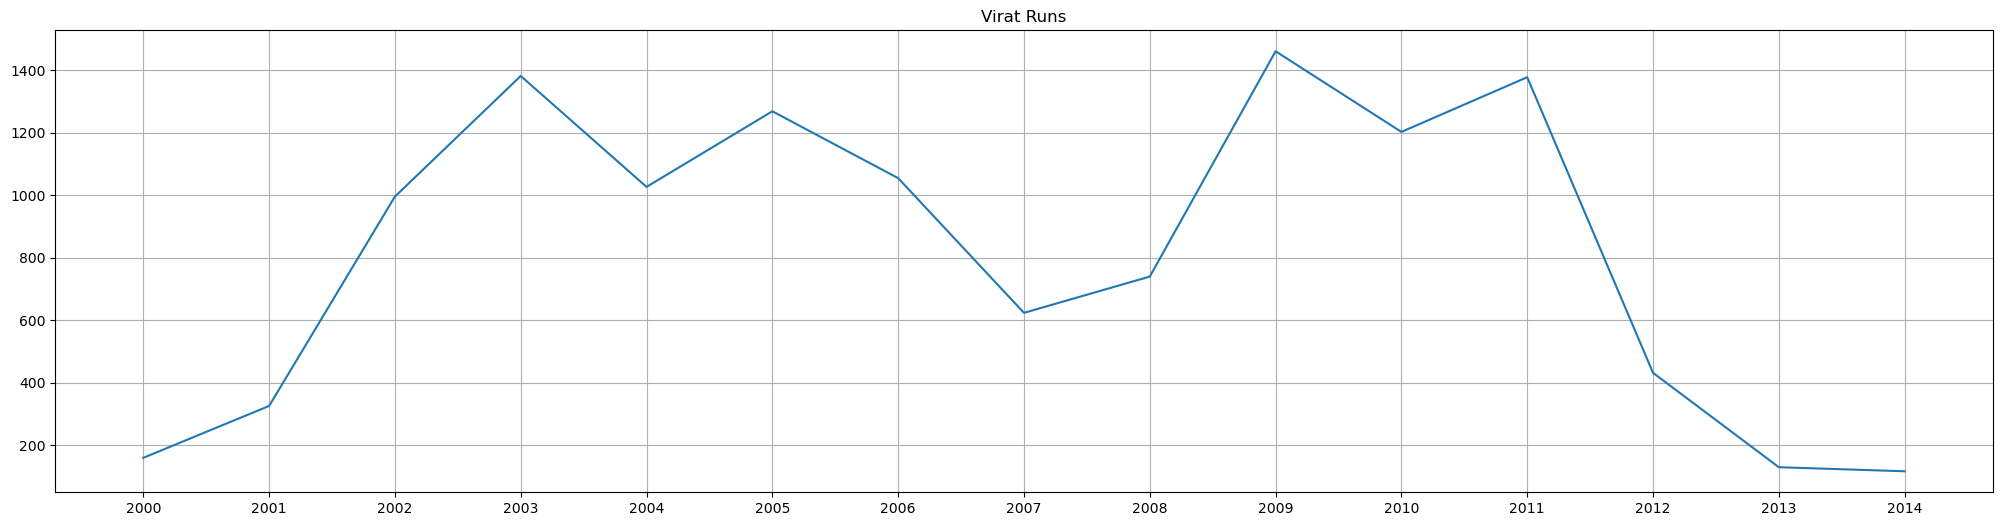

In [15]:

# Call the show_plot function
show_plot(virat_years, virat_runs, 'Virat Runs')

In [16]:
np.amax(virat_runs)

1460

In [17]:
##computing linear_model
def compute_linear_model(years, runs, title):
    X = np.column_stack([np.ones(len(years)), years])
    a = la.solve(X.T @ X, X.T @ runs)
    print(a)
    model = a[0] + a[1] * years
    
    plt.plot(years, model, 'b.', markersize=15)  # Separate the parameters properly
    plt.plot(years, runs, 'ro')  # Adjust the plot for actual runs data
    plt.title(title)
    plt.ylim([0, np.amax(runs) + 500])
    plt.grid(True)
    plt.show()
    

In [18]:
np.column_stack([np.ones(len(sachin_years)),sachin_years])

array([[1.000e+00, 1.990e+03],
       [1.000e+00, 1.991e+03],
       [1.000e+00, 1.992e+03],
       [1.000e+00, 1.993e+03],
       [1.000e+00, 1.994e+03],
       [1.000e+00, 1.995e+03],
       [1.000e+00, 1.996e+03],
       [1.000e+00, 1.997e+03],
       [1.000e+00, 1.998e+03],
       [1.000e+00, 1.999e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 2.001e+03],
       [1.000e+00, 2.002e+03],
       [1.000e+00, 2.003e+03],
       [1.000e+00, 2.004e+03],
       [1.000e+00, 2.005e+03],
       [1.000e+00, 2.006e+03],
       [1.000e+00, 2.007e+03],
       [1.000e+00, 2.008e+03],
       [1.000e+00, 2.009e+03],
       [1.000e+00, 2.010e+03],
       [1.000e+00, 2.011e+03],
       [1.000e+00, 2.012e+03]])

[ 2.74547571e+04 -1.32714286e+01]


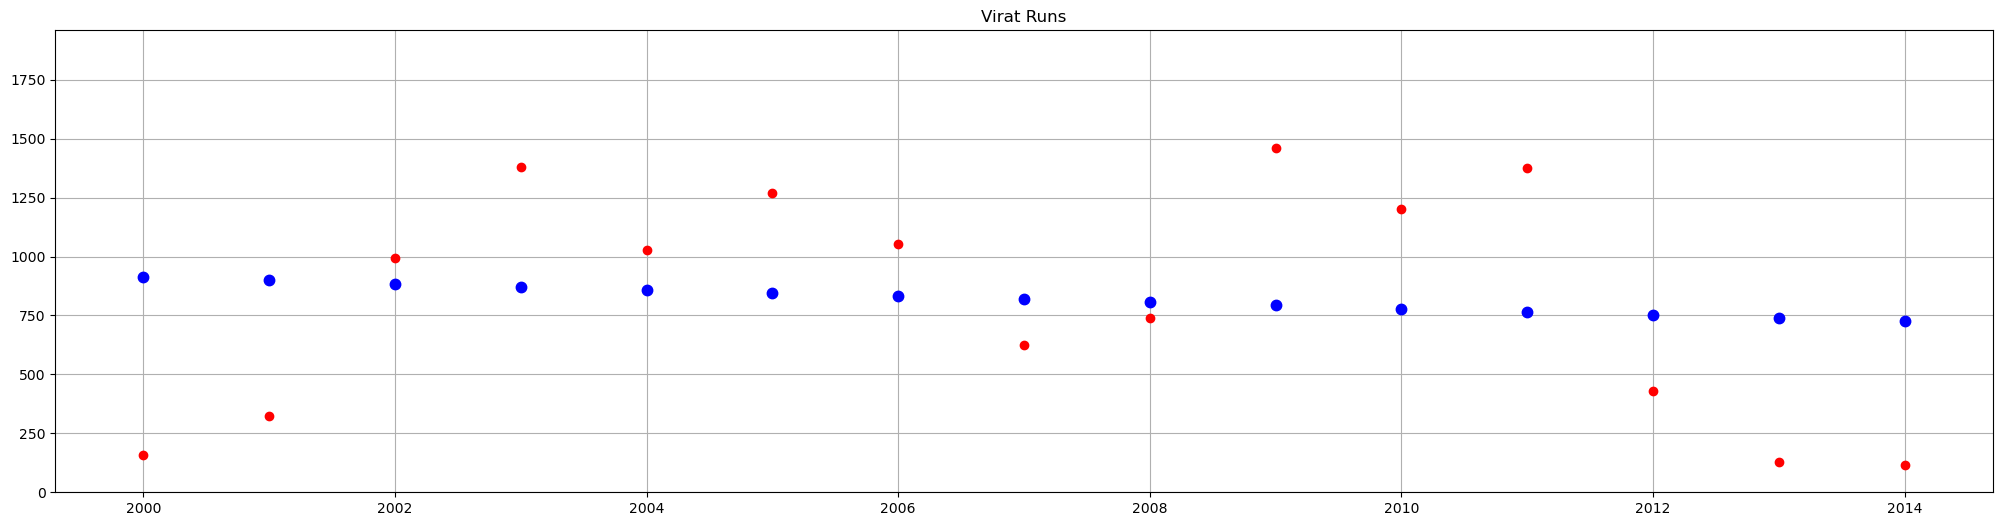

In [19]:
compute_linear_model(virat_years,virat_runs,'Virat Runs')

In [20]:
sachin_total_runs = np.sum(sachin_runs)
virat_total_runs = np.sum(virat_runs)

In [21]:
sachin_total_runs

18426

In [22]:
virat_total_runs

12285

In [23]:
def show_future_runs(years, runs):
    X = np.column_stack([np.ones(len(years)), years])
    a = la.solve(X.T @ X, X.T @ runs)

    future_years = np.array([2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])
    future_runs = (a[0]+a[1]*future_years)
    
    total_runs = np.sum(runs) + np.cumsum(future_runs)
    sachin_total_runs = 18426  # Assuming a total for comparison, you can change this based on actual data
    
    sachin = sachin_total_runs * np.ones(len(future_years))
                    
    plt.plot(future_years,total_runs,future_years,sachin)
    plt.grid(True)
    plt.xticks(future_years)
    plt.title('Virat Total Point Prediction')
    plt.show()
    
    

In [24]:
a = np.array([[1,2,3],[4,5,6]])
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

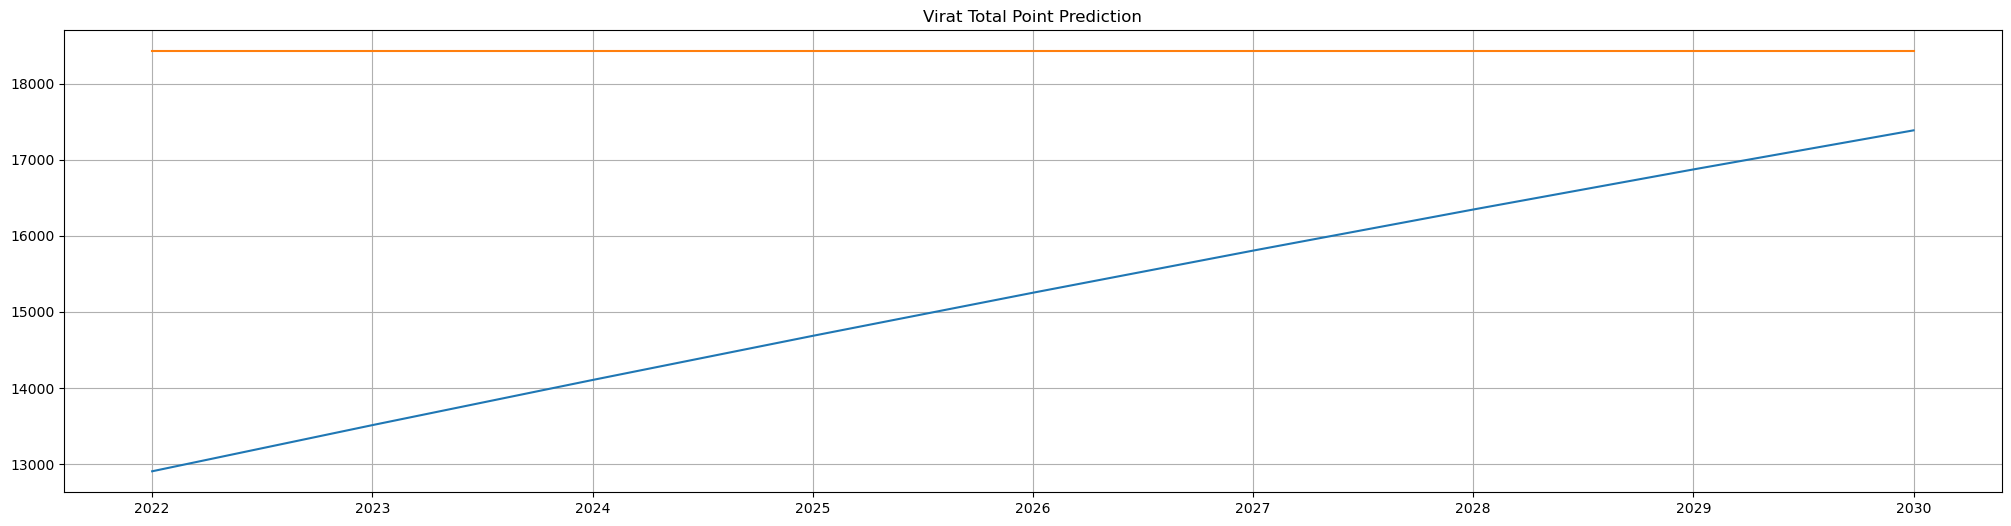

In [26]:

show_future_runs(virat_years, virat_runs)
